In [57]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [58]:
# Get the absolute path of the current file
try:
    # Works in .py scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter
    current_dir = os.getcwd()

# Go up N levels (here N=2, but you can adjust)
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))

# Add the project root to sys.path if not already there so that the ML_toolbox can be imported
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from ML_toolbox import d_lm_analytical_solution_class

In [59]:
# --------------------------------------------------------------------------
# set up plotting parameters
# --------------------------------------------------------------------------
line_width_1 = 2
line_width_2 = 2
marker_1 = '.' # point
marker_2 = 'o' # circle
marker_size = 12
line_style_1 = ':' # dotted line
line_style_2 = '-' # solid line

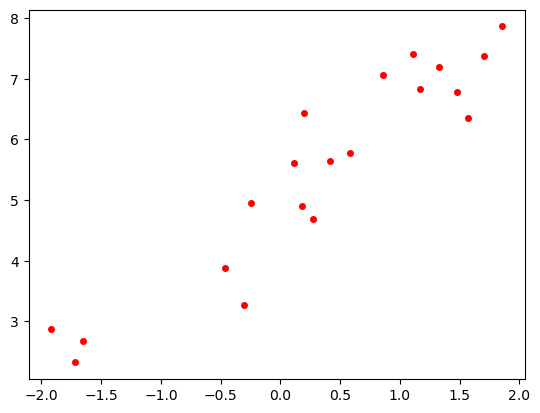

In [60]:
# generate x and y
n = 20

np.random.seed(0)
x = -2 + 4 * np.random.rand(n)
x = np.sort(x)

beta_0 = 5.0
beta_1 = 1.5
sigma = 0.5

epsilon = sigma * np.random.normal(loc=0.0, scale=1, size=n)

y_theoretical = beta_0 + beta_1 * x
y = beta_0 + beta_1 * x + epsilon

# plot the data
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', marker=marker_1, linewidth=line_width_1)

### SLR and compute the slope using
$$
\hat{\beta}_1 = \frac{cov(X, Y)}{var(X)}
$$

{'beta_1_hat': np.float64(1.4340058850011224), 'beta_0_hat': np.float64(5.02452502587169), 'sigma_hat': np.float64(0.6208922530981342), 'y_hat': array([2.27248646, 2.56397776, 2.65628897, 4.35594283, 4.58660716,
       4.6665238 , 5.19026697, 5.28197602, 5.30452043, 5.41483023,
       5.61397817, 5.86137709, 6.2588563 , 6.6200387 , 6.69786671,
       6.93244029, 7.14692342, 7.27174418, 7.46575736, 7.68410553]), 'R2': np.float64(0.8783358968145958), 'F_statistic': np.float64(129.94832270755967), 'F_test_p_value': np.float64(1.1480060235768974e-09), 'MS_error': np.float64(0.3855071899572777), 'beta_1_hat_CI': array([1.70515846, 4.71246548]), 'beta_1_hat_standard_error': np.float64(0.12906360506371195), 'beta_1_hat_t_statistic': np.float64(11.110846348149261), 'beta_1_hat_t_test_p_value': np.float64(1.7247077099824537e-09), 'beta_0_hat_standard_error': np.float64(0.1485345682554137), 'beta_0_hat_t_statistic': np.float64(33.82731094105806), 'beta_0_hat_t_test_p_value': np.float64(0.0), 'y_

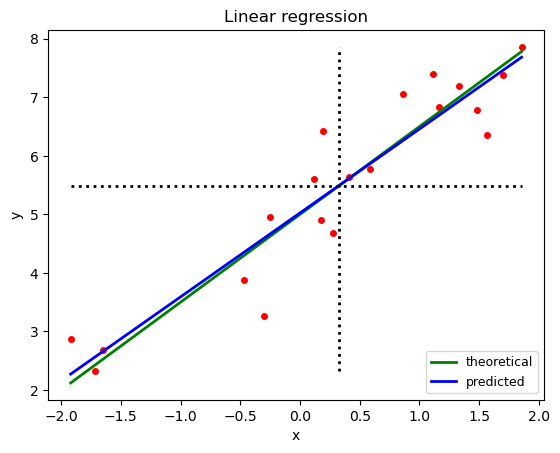

In [61]:
# --------------------------------------------------------------------------
# simple linear regression
# --------------------------------------------------------------------------
n = len(x)

x_bar = np.mean(x)
y_bar = np.mean(y)

# do linear regression using my own function
lm_d_result = d_lm_analytical_solution_class.d_lm(x, y)

# plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='red', marker=marker_1, linewidth=line_width_1)
ax.plot(x, y_theoretical, color='green', label='theoretical', linewidth=line_width_1)
ax.plot(x, lm_d_result['y_hat'], color='blue', label='predicted', linewidth=line_width_1)
ax.plot(x, np.ones(n)*y_bar, color='black', linestyle=':', linewidth=line_width_1)
ax.plot([x_bar, x_bar], [np.min(y), np.max(y)], color='black', linestyle=':', linewidth=line_width_1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Linear regression")
ax.legend(loc='lower right', fontsize=9)
print(lm_d_result)
# upper right, upper left, lower right, lower left, center left, center right, upper center, lower center

### MLR: compute coefficients using:
$$
\hat{\beta} = (X^T X)^{-1} X^T Y
$$

In [62]:
data_df = pd.read_csv('../../data/linear_regression/exam_scores_for_linear_regression.csv')
print(data_df.shape)
print(data_df.head())

(40, 4)
   study_hours   gpa  attendance  exam_score
0         6.96  3.25        72.8       105.4
1         2.86  2.23        87.7        81.8
2         2.27  2.63        82.2        82.6
3         5.51  2.83        75.6        80.9
4         7.19  3.73        97.0       122.2


In [63]:
y = data_df[['exam_score']]

In [64]:
x1 = data_df[['study_hours']]
x1 = sm.add_constant(x1)
print(x1.head())

   const  study_hours
0    1.0         6.96
1    1.0         2.86
2    1.0         2.27
3    1.0         5.51
4    1.0         7.19


Text(0, 0.5, 'exam score')

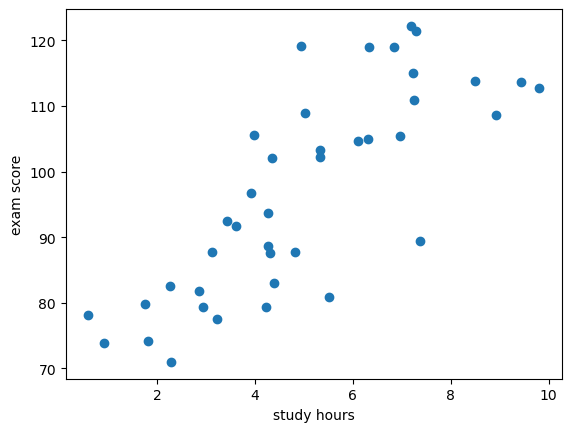

In [65]:
fig, ax = plt.subplots()
ax.scatter(data_df['study_hours'], data_df['exam_score'])
ax.set_xlabel('study hours')
ax.set_ylabel('exam score')

In [66]:
model_1 = sm.OLS(y, x1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     63.30
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           1.30e-09
Time:                        16:43:21   Log-Likelihood:                -146.28
No. Observations:                  40   AIC:                             296.6
Df Residuals:                      38   BIC:                             299.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          70.1733      3.671     19.116      

In [67]:
x2 = data_df[['study_hours', 'gpa']]
x2 = sm.add_constant(x2)
print(x2.head())

   const  study_hours   gpa
0    1.0         6.96  3.25
1    1.0         2.86  2.23
2    1.0         2.27  2.63
3    1.0         5.51  2.83
4    1.0         7.19  3.73


In [68]:
model_2 = sm.OLS(y, x2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.97
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           8.32e-12
Time:                        16:49:58   Log-Likelihood:                -138.31
No. Observations:                  40   AIC:                             282.6
Df Residuals:                      37   BIC:                             287.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          40.8286      7.538      5.417      

In [69]:
x3 = data_df[['study_hours', 'gpa', 'attendance']]
x3 = sm.add_constant(x3)
print(x3.head())

   const  study_hours   gpa  attendance
0    1.0         6.96  3.25        72.8
1    1.0         2.86  2.23        87.7
2    1.0         2.27  2.63        82.2
3    1.0         5.51  2.83        75.6
4    1.0         7.19  3.73        97.0


In [70]:
model_3 = sm.OLS(y, x3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     38.48
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           2.53e-11
Time:                        16:59:46   Log-Likelihood:                -137.16
No. Observations:                  40   AIC:                             282.3
Df Residuals:                      36   BIC:                             289.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.7867     12.699      2.031      